In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [45]:
data = pd.read_csv('SNACKS_PRODUCTS.csv')

In [46]:
data.head(5)

,id,QtySold,Price,Advertised,Holiday,Date,Product
0,1,0,1.99,0,0,18-Oct-04,Baked potato chips
1,2,4,1.99,0,0,18-Oct-04,Barbeque pork rinds
2,3,5,1.99,0,0,18-Oct-04,Barbeque potato chips
3,4,2,2.99,0,0,18-Oct-04,Bread sticks
4,5,5,1.99,0,0,18-Oct-04,Buttery popcorn


In [47]:
data['year'] = pd.DatetimeIndex(data['Date']).year
data['month'] = pd.DatetimeIndex(data['Date']).month
data

,id,QtySold,Price,Advertised,Holiday,Date,Product,year,month
0,1,0,1.99,0,0,18-Oct-04,Baked potato chips,2004,10
1,2,4,1.99,0,0,18-Oct-04,Barbeque pork rinds,2004,10
2,3,5,1.99,0,0,18-Oct-04,Barbeque potato chips,2004,10
3,4,2,2.99,0,0,18-Oct-04,Bread sticks,2004,10
4,5,5,1.99,0,0,18-Oct-04,Buttery popcorn,2004,10
...,...,...,...,...,...,...,...,...,...
35765,35766,0,0.99,0,0,01-Jan-02,Tortilla chips,2002,1
35766,35767,0,1.99,0,0,01-Jan-02,WOW cheese puffs,2002,1
35767,35768,0,2.99,0,0,01-Jan-02,WOW potato chips,2002,1
35768,35769,0,2.99,0,0,01-Jan-02,WOW tortilla chips,2002,1


In [48]:
data.isnull().sum()

id            0
QtySold       0
Price         0
Advertised    0
Holiday       0
Date          0
Product       0
year          0
month         0
dtype: int64

1) The Year which snacks are mostly brought

<AxesSubplot:xlabel='year'>

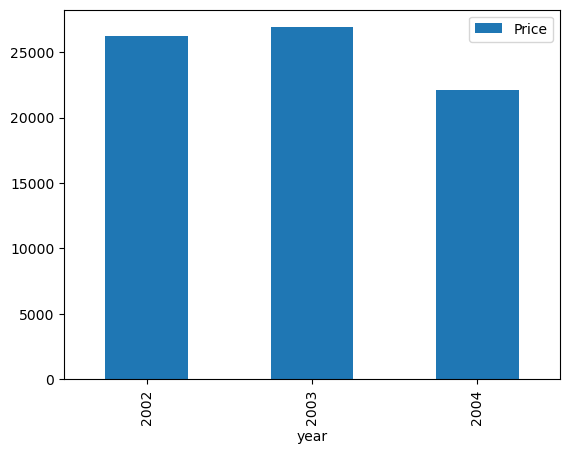

In [64]:
price_date = data.groupby('year').sum().reset_index()
price_date.plot(x='year',y='Price',kind='bar')

2) The Month which snacks are mostly brought

<AxesSubplot:xlabel='month'>

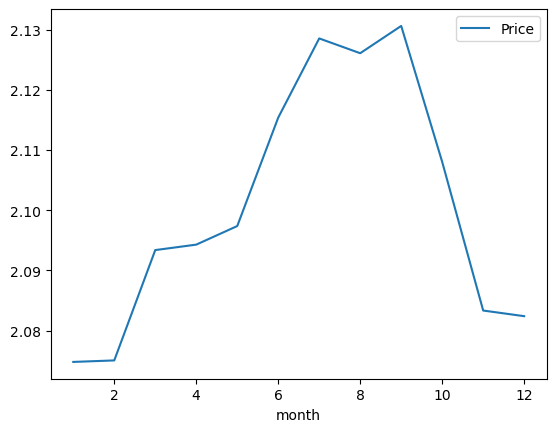

In [58]:
price_month = data.groupby('month').mean().reset_index()
price_month.plot(x='month',y='Price')

3) How many times are the products advertised

<AxesSubplot:>

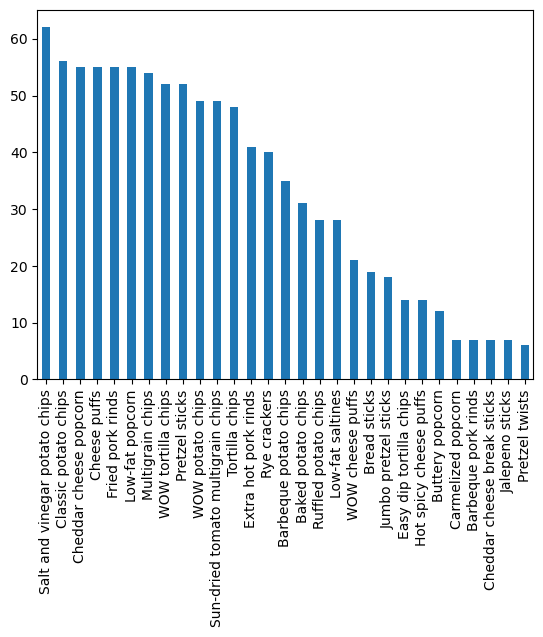

In [71]:
advertised = data[data['Advertised'] == 1]
advertised = advertised['Product'].value_counts()
advertised.plot(kind='bar')

4) products which are prefered or brought on holidays

<AxesSubplot:xlabel='Product'>

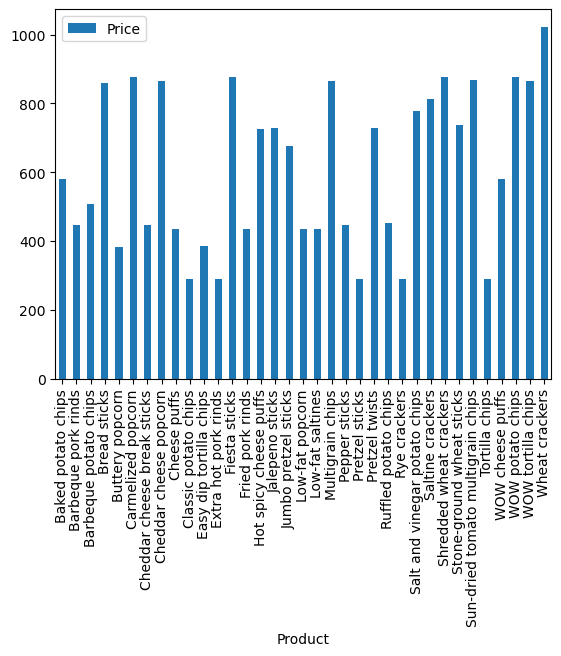

In [82]:
holiday = data[data['Holiday'] == 1]
holiday = holiday.groupby('Product').sum().reset_index()
holiday.plot(x='Product',y='Price',kind='bar')

5) the sum of quantity sold per product

<AxesSubplot:xlabel='Product'>

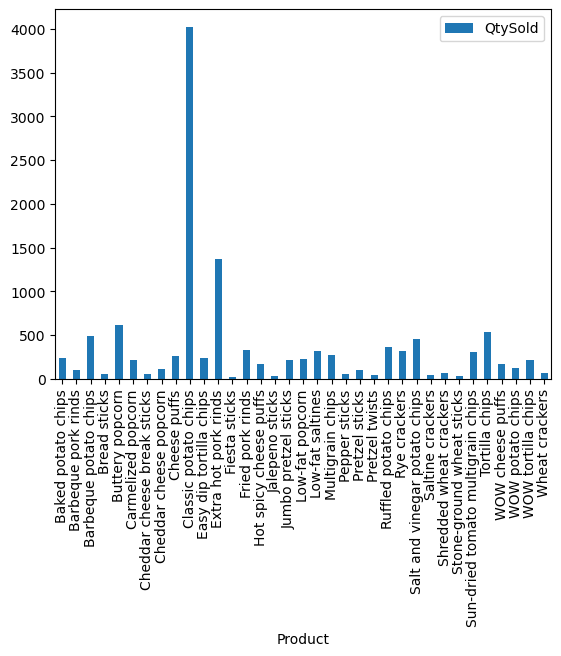

In [119]:
quantity = data[data[['QtySold']].apply(lambda x: x[0].isdigit(), axis=1)]
quantity = quantity.groupby(['QtySold','Product']).sum().reset_index()
quantity = quantity[['QtySold','Product']]
quantity['QtySold'] = quantity['QtySold'].astype(int)
quantity = quantity.groupby('Product').sum().reset_index()
quantity.plot(x='Product',y='QtySold',kind='bar')